In [3]:
import keras
import sklearn.model_selection
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy




Using TensorFlow backend.


# DATASET 1 - BANK DATA

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
df = pd.read_csv("C:\\ITM SPRING 2020\\New folder\\BANK_FULL.csv")


d1=pd.get_dummies(df['default'],drop_first=False).rename(columns=lambda x:'default_'+str(x))
d2=pd.get_dummies(df['housing'],drop_first=False).rename(columns=lambda x:'housing_'+str(x))
d3=pd.get_dummies(df['loan'],drop_first=False).rename(columns=lambda x:'loan_'+str(x))
d4=pd.get_dummies(df['marital'],drop_first=False).rename(columns=lambda x:'marital_' + str(x))
d5=pd.get_dummies(df['contact'],drop_first=False).rename(columns=lambda x:'contact_' + str(x))
d6=pd.get_dummies(df['poutcome'],drop_first=False).rename(columns=lambda x:'poutcome_' + str(x))

df.drop(columns =['marital','contact','poutcome','default','housing','loan'],inplace=True)
df=pd.concat([df,d1,d2,d3,d4,d5,d6], axis=1)


job_map       = {'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5,
                 'retired':6, 'admin.':7 ,'services':8, 'self-employed':9, 'unemployed':10, 'housemaid':11,
                 'student':12}
education_map = {'tertiary':1 ,'secondary':2,'unknown':4, 'primary':3}
month_map     = {'may':5, 'jun':6, 'jul':7 ,'aug':8 ,'oct':10 ,'nov':11, 'dec':12, 'jan':1, 'feb':2 ,'mar':3, 'apr':4 ,'sep':9}
y_map         = {"no":0,"yes":1}

df["job_"]       = df.job.map(job_map)
df["education_"] = df.education.map(education_map)
df["month_"]     = df.month.map(month_map)
df["target"]     = df.y.map(y_map)
df.drop(columns  = ["job","education","month","y"],inplace=True)
data = df.copy()

In [23]:
data = data.sample(10000)

In [24]:
from sklearn import preprocessing
X_dataset = data.drop(columns="target")
X = preprocessing.scale(X_dataset)
y = data.target

x_train, x_test, y_train, y_test     = train_test_split(X, y, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Activation Function : Relu
 - No of Hidden Layers : 1
 - No of nodes in Hidden Layer 1: [10,20,30]
 - Iterations Range : 10 to 500
 - Sample size range from : 50000, 2000, 5000, 15000

SAMPLE SIZE : 50000

Train on 28934 samples, validate on 7234 samples
Epoch 1/10
28934/28934 [==============================] - 2s 55us/step - loss: 0.3343 - accuracy: 0.8746 - val_loss: 0.2489 - val_accuracy: 0.8996
Epoch 2/10
28934/28934 [==============================] - 1s 46us/step - loss: 0.2527 - accuracy: 0.8974 - val_loss: 0.2382 - val_accuracy: 0.8992
Epoch 3/10
28934/28934 [==============================] - 2s 86us/step - loss: 0.2430 - accuracy: 0.8973 - val_loss: 0.2333 - val_accuracy: 0.8973
Epoch 4/10
28934/28934 [==============================] - ETA: 0s - loss: 0.2400 - accuracy: 0.8996 ETA: 0s - loss: 0.240 - 1s 47us/step - loss: 0.2400 - accuracy: 0.8997 - val_loss: 0.2337 - val_accuracy: 0.8980
Epoch 5/10
28934/28934 [==============================] - 1s 48us/step - loss: 0.2382 - accuracy: 0.8980 - val_loss: 0.2317 - val_accuracy: 0.8991
Epoch 6/10
28934/28934 [==============================] - 2s 53us/step - loss: 0.2358 - accuracy: 0.8984 - val_loss: 0.2299 - val_accuracy: 0.9005
Epo

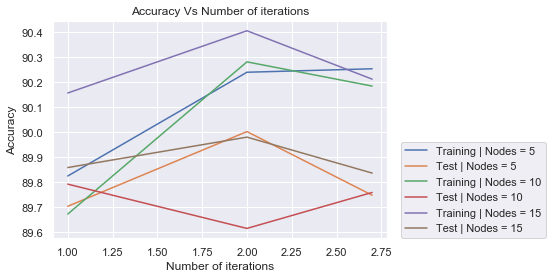

In [11]:
#SAMPLE SIZE : 50000
nodes = [5,10,15]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='relu')) # input layer requires input_dim param
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('Accuracy Vs Number of iterations')
    plt.legend(loc=(1.04,0))
    plt.show



SAMPLE SIZE : 2000

Train on 1280 samples, validate on 320 samples
Epoch 1/10
1280/1280 [==============================] - 0s 201us/step - loss: 0.5026 - accuracy: 0.8430 - val_loss: 0.4375 - val_accuracy: 0.8656
Epoch 2/10
1280/1280 [==============================] - 0s 65us/step - loss: 0.3979 - accuracy: 0.8805 - val_loss: 0.3784 - val_accuracy: 0.8656
Epoch 3/10
1280/1280 [==============================] - 0s 69us/step - loss: 0.3491 - accuracy: 0.8813 - val_loss: 0.3568 - val_accuracy: 0.8656
Epoch 4/10
1280/1280 [==============================] - 0s 64us/step - loss: 0.3217 - accuracy: 0.8797 - val_loss: 0.3450 - val_accuracy: 0.8656
Epoch 5/10
1280/1280 [==============================] - 0s 59us/step - loss: 0.3108 - accuracy: 0.8820 - val_loss: 0.3394 - val_accuracy: 0.8656
Epoch 6/10
1280/1280 [==============================] - ETA: 0s - loss: 0.2890 - accuracy: 0.88 - 0s 67us/step - loss: 0.2990 - accuracy: 0.8813 - val_loss: 0.3348 - val_accuracy: 0.8656
Epoch 7/10
1280/1280 [==================

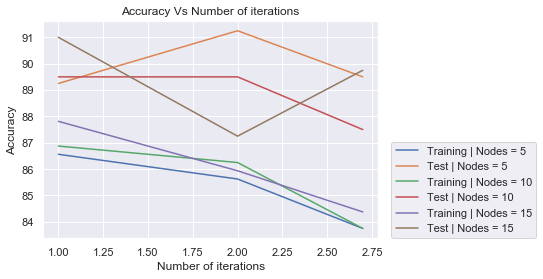

In [16]:
#2000
nodes = [5,10,15]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='relu')) # input layer requires input_dim param
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('Accuracy Vs Number of iterations')
    plt.legend(loc=(1.04,0))
    plt.show



SAMPLE SIZE : 5000

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 0s 90us/step - loss: 0.4132 - accuracy: 0.8903 - val_loss: 0.3848 - val_accuracy: 0.8675
Epoch 2/10
3200/3200 [==============================] - 0s 48us/step - loss: 0.3091 - accuracy: 0.8950 - val_loss: 0.3274 - val_accuracy: 0.8675
Epoch 3/10
3200/3200 [==============================] - 0s 49us/step - loss: 0.2660 - accuracy: 0.8953 - val_loss: 0.3051 - val_accuracy: 0.8675
Epoch 4/10
3200/3200 [==============================] - 0s 51us/step - loss: 0.2497 - accuracy: 0.8950 - val_loss: 0.3010 - val_accuracy: 0.8675
Epoch 5/10
3200/3200 [==============================] - 0s 52us/step - loss: 0.2446 - accuracy: 0.8950 - val_loss: 0.2916 - val_accuracy: 0.8675
Epoch 6/10
3200/3200 [==============================] - 0s 55us/step - loss: 0.2377 - accuracy: 0.8950 - val_loss: 0.2906 - val_accuracy: 0.8675
Epoch 7/10
3200/3200 [==============================] - 0s 66us/step - loss: 0.2325

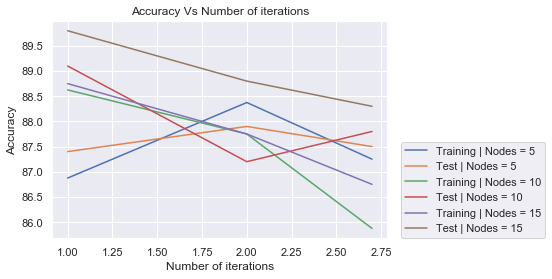

In [21]:
#5000
nodes = [5,10,15]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='relu')) # input layer requires input_dim param
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('Accuracy Vs Number of iterations')
    plt.legend(loc=(1.04,0))
    plt.show



SAMPLE SIZE : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 0s 70us/step - loss: 0.5789 - accuracy: 0.7339 - val_loss: 0.3564 - val_accuracy: 0.8969
Epoch 2/10
6400/6400 [==============================] - 0s 60us/step - loss: 0.3556 - accuracy: 0.8889 - val_loss: 0.2743 - val_accuracy: 0.9075
Epoch 3/10
6400/6400 [==============================] - 0s 59us/step - loss: 0.3185 - accuracy: 0.8931 - val_loss: 0.2557 - val_accuracy: 0.9031
Epoch 4/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.3101 - accuracy: 0.8950 - val_loss: 0.2477 - val_accuracy: 0.9031
Epoch 5/10
6400/6400 [==============================] - 0s 59us/step - loss: 0.2966 - accuracy: 0.8956 - val_loss: 0.2402 - val_accuracy: 0.9038
Epoch 6/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.2889 - accuracy: 0.8961 - val_loss: 0.2359 - val_accuracy: 0.9013
Epoch 7/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.283

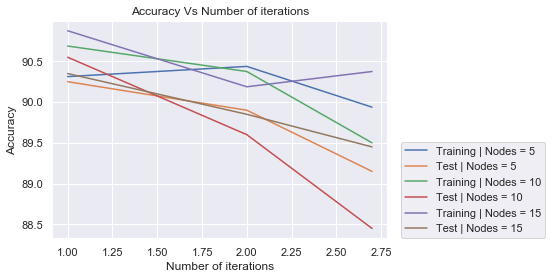

In [25]:
#15000

#5000
nodes = [5,10,15]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='relu')) # input layer requires input_dim param
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('Accuracy Vs Number of iterations')
    plt.legend(loc=(1.04,0))
    plt.show



In [ ]:
Selected 15000 as sample size : 
    

# Activation Function used in 1ST Hidden layers : RELU
- number of nodes in layer 1: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 79us/step - loss: 0.5972 - accuracy: 0.7716 - val_loss: 0.3529 - val_accuracy: 0.9013
Epoch 2/10
6400/6400 [==============================] - 0s 54us/step - loss: 0.3510 - accuracy: 0.8878 - val_loss: 0.2609 - val_accuracy: 0.9044
Epoch 3/10
6400/6400 [==============================] - 0s 52us/step - loss: 0.3235 - accuracy: 0.8930 - val_loss: 0.2493 - val_accuracy: 0.9075
Epoch 4/10
6400/6400 [==============================] - 0s 52us/step - loss: 0.3077 - accuracy: 0.8945 - val_loss: 0.2417 - val_accuracy: 0.9075
Epoch 5/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.2930 - accuracy: 0.8925 - val_loss: 0.2360 - val_accuracy: 0.9025
Epoch 6/10
6400/6400 [==============================] - 0s 52us/step - loss: 0.2767 - accuracy: 0.8938 - val_loss: 0.2307 - val_accuracy: 0.9031
Epoch 7/10
6400/6400 [==============================] - 0s 56us/step - loss: 0.262

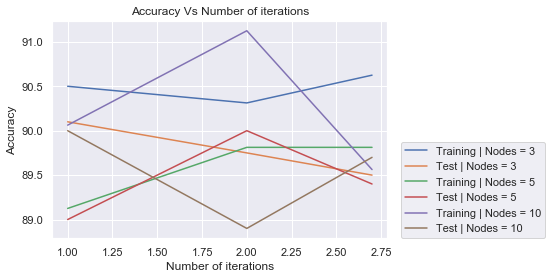

In [26]:
#15000

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='relu')) # input layer requires input_dim param
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('RELU | Varying Nodes (hidden layer-1)|Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



# Activation Function used in both the layers : RELU
- number of nodes in layer 1: 5
- number of nodes in layer 2: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 90us/step - loss: 0.4522 - accuracy: 0.8653 - val_loss: 0.2912 - val_accuracy: 0.8913
Epoch 2/10
6400/6400 [==============================] - 0s 58us/step - loss: 0.3279 - accuracy: 0.8777 - val_loss: 0.2513 - val_accuracy: 0.8913
Epoch 3/10
6400/6400 [==============================] - 0s 54us/step - loss: 0.2913 - accuracy: 0.8777 - val_loss: 0.2386 - val_accuracy: 0.8913
Epoch 4/10
6400/6400 [==============================] - 0s 55us/step - loss: 0.2798 - accuracy: 0.8788 - val_loss: 0.2334 - val_accuracy: 0.8938
Epoch 5/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.2729 - accuracy: 0.8839 - val_loss: 0.2318 - val_accuracy: 0.8900
Epoch 6/10
6400/6400 [==============================] - 0s 54us/step - loss: 0.2641 - accuracy: 0.8916 - val_loss: 0.2296 - val_accuracy: 0.9031
Epoch 7/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.260

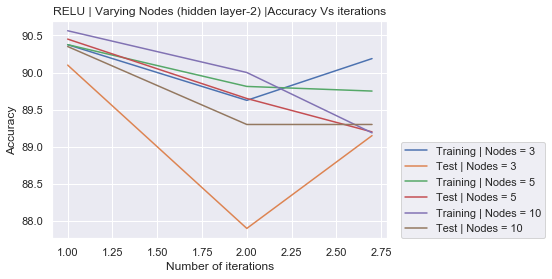

In [27]:
#15000
# As number of nodes = 5  in layer one gave least training and test error will check for
#appropriate number of nodes in layer 2

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='relu')) # input layer requires input_dim param
        model.add(Dense(5, activation='relu'))
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('RELU | Varying Nodes (hidden layer-2) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



# Activation Function used in all three layers : RELU
- number of nodes in layer 1: 5
- number of nodes in layer 2: 5
- number of nodes in layer 3: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 80us/step - loss: 0.6635 - accuracy: 0.7319 - val_loss: 0.5025 - val_accuracy: 0.8925
Epoch 2/10
6400/6400 [==============================] - 0s 54us/step - loss: 0.3956 - accuracy: 0.8806 - val_loss: 0.2674 - val_accuracy: 0.8963
Epoch 3/10
6400/6400 [==============================] - 0s 58us/step - loss: 0.3211 - accuracy: 0.8919 - val_loss: 0.2427 - val_accuracy: 0.8994
Epoch 4/10
6400/6400 [==============================] - 0s 65us/step - loss: 0.3063 - accuracy: 0.8948 - val_loss: 0.2348 - val_accuracy: 0.9019
Epoch 5/10
6400/6400 [==============================] - 0s 75us/step - loss: 0.2926 - accuracy: 0.8977 - val_loss: 0.2335 - val_accuracy: 0.9013
Epoch 6/10
6400/6400 [==============================] - 0s 62us/step - loss: 0.2859 - accuracy: 0.8991 - val_loss: 0.2318 - val_accuracy: 0.8994
Epoch 7/10
6400/6400 [==============================] - 0s 62us/step - loss: 0.284

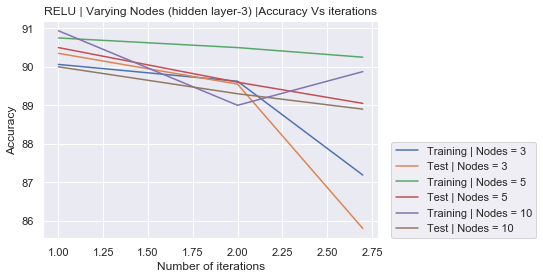

In [33]:
#15000
# As number of nodes = 5  in layer one gave least training and test error 
# As number of nodes = 5  in layer two gave least training and test error 
# Checking for appropriate number of nodes in layer 3


nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='relu')) # input layer requires input_dim param
        model.add(Dense(5, activation='relu'))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('RELU | Varying Nodes (hidden layer-3) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


In [ ]:
RELU ACTIVATION FUNCTION:
Layer 1 - 5
Layer 2 - 5
Layer 3 - 10

# Activation Function used in first the layer : SIGMOID
- number of nodes in layer 1: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 117us/step - loss: 0.4351 - accuracy: 0.8581 - val_loss: 0.3383 - val_accuracy: 0.8913
Epoch 2/10
6400/6400 [==============================] - 1s 88us/step - loss: 0.3724 - accuracy: 0.8770 - val_loss: 0.3060 - val_accuracy: 0.8913
Epoch 3/10
6400/6400 [==============================] - 1s 87us/step - loss: 0.3391 - accuracy: 0.8770 - val_loss: 0.2806 - val_accuracy: 0.8913
Epoch 4/10
6400/6400 [==============================] - 1s 87us/step - loss: 0.3097 - accuracy: 0.8781 - val_loss: 0.2584 - val_accuracy: 0.8913
Epoch 5/10
6400/6400 [==============================] - 1s 87us/step - loss: 0.2939 - accuracy: 0.8838 - val_loss: 0.2447 - val_accuracy: 0.8950
Epoch 6/10
6400/6400 [==============================] - 1s 86us/step - loss: 0.2806 - accuracy: 0.8914 - val_loss: 0.2372 - val_accuracy: 0.9013
Epoch 7/10
6400/6400 [==============================] - 1s 88us/step - loss: 0.27

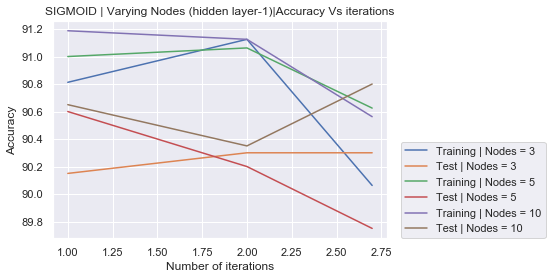

In [34]:
#15000

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='sigmoid')) # input layer requires input_dim param
        model.add(Dense(i, activation='sigmoid'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('SIGMOID | Varying Nodes (hidden layer-1)|Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



# Activation Function used in both the layers : SIGMOID
- number of nodes in layer 1: 10
- number of nodes in layer 2: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 84us/step - loss: 0.4258 - accuracy: 0.8770 - val_loss: 0.3539 - val_accuracy: 0.8913
Epoch 2/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.3829 - accuracy: 0.8770 - val_loss: 0.3387 - val_accuracy: 0.8913
Epoch 3/10
6400/6400 [==============================] - 0s 60us/step - loss: 0.3700 - accuracy: 0.8770 - val_loss: 0.3261 - val_accuracy: 0.8913
Epoch 4/10
6400/6400 [==============================] - 0s 70us/step - loss: 0.3548 - accuracy: 0.8770 - val_loss: 0.3047 - val_accuracy: 0.8913
Epoch 5/10
6400/6400 [==============================] - 0s 58us/step - loss: 0.3302 - accuracy: 0.8770 - val_loss: 0.2832 - val_accuracy: 0.8913
Epoch 6/10
6400/6400 [==============================] - 0s 56us/step - loss: 0.3101 - accuracy: 0.8770 - val_loss: 0.2666 - val_accuracy: 0.8913
Epoch 7/10
6400/6400 [==============================] - 0s 76us/step - loss: 0.294

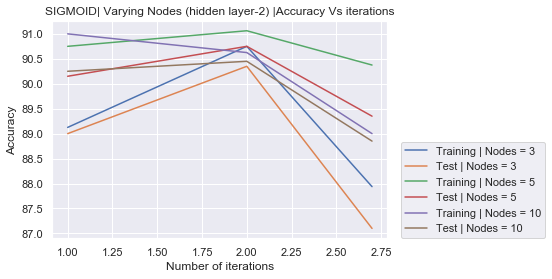

In [36]:
#15000
# As number of nodes = 10  in layer one gave least training and test error will check for
#appropriate number of nodes in layer 2

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='sigmoid')) # input layer requires input_dim param
        model.add(Dense(10, activation='sigmoid'))
        model.add(Dense(i, activation='sigmoid'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('SIGMOID| Varying Nodes (hidden layer-2) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



# Activation Function used in all three layers : SIGMOID
- number of nodes in layer 1: 5
- number of nodes in layer 2: 5
- number of nodes in layer 3: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 101us/step - loss: 0.6170 - accuracy: 0.6355 - val_loss: 0.4138 - val_accuracy: 0.8913
Epoch 2/10
6400/6400 [==============================] - 0s 63us/step - loss: 0.4270 - accuracy: 0.8494 - val_loss: 0.3529 - val_accuracy: 0.8913
Epoch 3/10
6400/6400 [==============================] - 0s 52us/step - loss: 0.3968 - accuracy: 0.8773 - val_loss: 0.3353 - val_accuracy: 0.8913
Epoch 4/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.3781 - accuracy: 0.8770 - val_loss: 0.3177 - val_accuracy: 0.8913
Epoch 5/10
6400/6400 [==============================] - 0s 60us/step - loss: 0.3509 - accuracy: 0.8770 - val_loss: 0.2988 - val_accuracy: 0.8913
Epoch 6/10
6400/6400 [==============================] - 0s 62us/step - loss: 0.3320 - accuracy: 0.8770 - val_loss: 0.2801 - val_accuracy: 0.8913
Epoch 7/10
6400/6400 [==============================] - 0s 69us/step - loss: 0.31

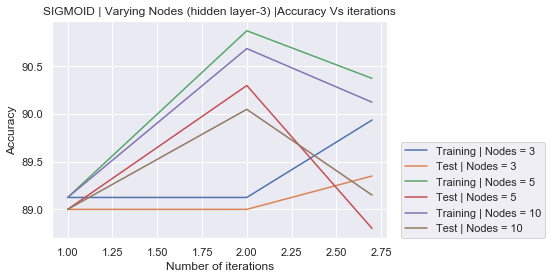

In [37]:
#15000
# As number of nodes = 5  in layer one gave least training and test error 
# As number of nodes = 5  in layer two gave least training and test error 
# Checking for appropriate number of nodes in layer 3


nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='sigmoid')) # input layer requires input_dim param
        model.add(Dense(5, activation='sigmoid'))
        model.add(Dense(5, activation='sigmoid'))
        model.add(Dense(i, activation='sigmoid'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('SIGMOID | Varying Nodes (hidden layer-3) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


In [ ]:
SIGMOID ACTIVATION FUNCTION:
Layer 1 - 5
Layer 2 - 5
Layer 3 - 3

# Activation Function used in first the layer : tanh
- number of nodes in layer 1: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 146us/step - loss: 0.4983 - accuracy: 0.7944 - val_loss: 0.3304 - val_accuracy: 0.9025
Epoch 2/10
6400/6400 [==============================] - 1s 120us/step - loss: 0.3185 - accuracy: 0.8925 - val_loss: 0.2610 - val_accuracy: 0.9081
Epoch 3/10
6400/6400 [==============================] - 1s 107us/step - loss: 0.2861 - accuracy: 0.8970 - val_loss: 0.2485 - val_accuracy: 0.9062
Epoch 4/10
6400/6400 [==============================] - 1s 85us/step - loss: 0.2799 - accuracy: 0.8972 - val_loss: 0.2425 - val_accuracy: 0.9087
Epoch 5/10
6400/6400 [==============================] - 1s 93us/step - loss: 0.2699 - accuracy: 0.8958 - val_loss: 0.2386 - val_accuracy: 0.9044
Epoch 6/10
6400/6400 [==============================] - 1s 85us/step - loss: 0.2629 - accuracy: 0.9003 - val_loss: 0.2375 - val_accuracy: 0.9038
Epoch 7/10
6400/6400 [==============================] - 1s 89us/step - loss: 0.

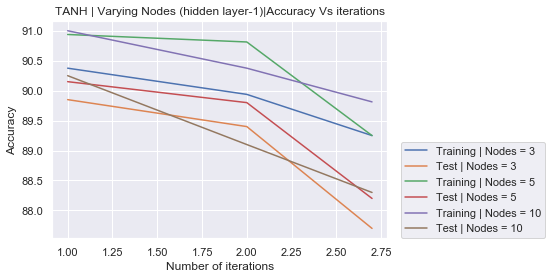

In [35]:
#15000

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(i, activation='tanh'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('TANH | Varying Nodes (hidden layer-1)|Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



# Activation Function used in both the layers : Tanh
- number of nodes in layer 1: 5
- number of nodes in layer 2: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 100us/step - loss: 0.5209 - accuracy: 0.7716 - val_loss: 0.3356 - val_accuracy: 0.9000
Epoch 2/10
6400/6400 [==============================] - 0s 57us/step - loss: 0.3191 - accuracy: 0.8920 - val_loss: 0.2645 - val_accuracy: 0.9106
Epoch 3/10
6400/6400 [==============================] - 0s 55us/step - loss: 0.2846 - accuracy: 0.8969 - val_loss: 0.2478 - val_accuracy: 0.9106
Epoch 4/10
6400/6400 [==============================] - 0s 57us/step - loss: 0.2732 - accuracy: 0.8986 - val_loss: 0.2391 - val_accuracy: 0.9100
Epoch 5/10
6400/6400 [==============================] - 0s 58us/step - loss: 0.2674 - accuracy: 0.8959 - val_loss: 0.2361 - val_accuracy: 0.9087
Epoch 6/10
6400/6400 [==============================] - 0s 76us/step - loss: 0.2578 - accuracy: 0.8975 - val_loss: 0.2317 - val_accuracy: 0.9119
Epoch 7/10
6400/6400 [==============================] - 0s 66us/step - loss: 0.25

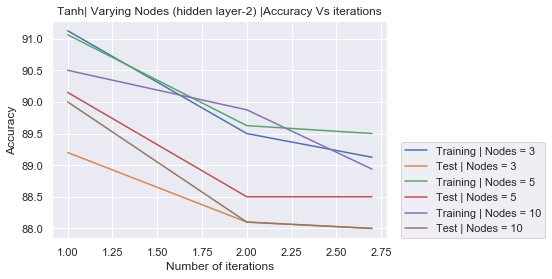

In [38]:
#15000
# As number of nodes = 5 in layer one gave least training and test error will check for
#appropriate number of nodes in layer 2

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(5, activation='tanh'))
        model.add(Dense(i, activation='tanh'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('Tanh| Varying Nodes (hidden layer-2) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



# Activation Function used in all three layers : RELU
- number of nodes in layer 1: 5
- number of nodes in layer 2: 5
- number of nodes in layer 3: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 95us/step - loss: 0.4568 - accuracy: 0.8161 - val_loss: 0.2956 - val_accuracy: 0.9013
Epoch 2/10
6400/6400 [==============================] - 0s 67us/step - loss: 0.3011 - accuracy: 0.8953 - val_loss: 0.2594 - val_accuracy: 0.9062
Epoch 3/10
6400/6400 [==============================] - 0s 60us/step - loss: 0.2819 - accuracy: 0.8975 - val_loss: 0.2454 - val_accuracy: 0.9100
Epoch 4/10
6400/6400 [==============================] - 0s 63us/step - loss: 0.2673 - accuracy: 0.8988 - val_loss: 0.2396 - val_accuracy: 0.9081
Epoch 5/10
6400/6400 [==============================] - 0s 60us/step - loss: 0.2638 - accuracy: 0.8984 - val_loss: 0.2322 - val_accuracy: 0.9081
Epoch 6/10
6400/6400 [==============================] - 0s 73us/step - loss: 0.2585 - accuracy: 0.8995 - val_loss: 0.2293 - val_accuracy: 0.9069
Epoch 7/10
6400/6400 [==============================] - 1s 80us/step - loss: 0.251

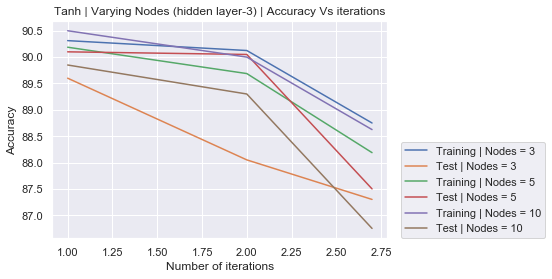

In [39]:
#15000
# As number of nodes = 5  in layer one gave least training and test error 
# As number of nodes = 5  in layer two gave least training and test error 
# Checking for appropriate number of nodes in layer 3


nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=26, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(5, activation='tanh'))
        model.add(Dense(5, activation='tanh'))
        model.add(Dense(i, activation='tanh'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('Tanh | Varying Nodes (hidden layer-3) | Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


TANH ACTIVATION FUNCTION:
Layer 1 - 5
Layer 2 - 5
Layer 3 - 5

with the increase number of iterations the accuracy of the model goes down 
when tanh is used as activation funtion 

# DATASET 2 - GPU RUN TIME 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

#importing the data
dt = pd.read_csv("C:\\ITM SPRING 2020\\ML\\sgemm_product_dataset\\processed_sgemm_product.csv")
df = dt.copy()

#classifying numeric runtime into two classes. Run time higher than 250 is 0 and lower will be 1
df['target'] = np.where(df['MeanRun']>100, 0, 1)

#dropping the numeric target column
df.drop('MeanRun',axis=1,inplace=True)

#As SVM takes long time to run, sampling only 25000 records for running this algorithm
dt = df.sample(n = 10000)

#
X_dataset=dt.drop(columns=['target'])
y=dt['target']

from sklearn import preprocessing
X = preprocessing.scale(X_dataset)

In [4]:
x_train, x_test, y_train, y_test     = train_test_split(X, y, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Activation Function used in 1st Hidden layers : RELU
- number of nodes in layer 1: [3,5,10]
- sample size : 25000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 168us/step - loss: 0.6046 - accuracy: 0.6608 - val_loss: 0.4666 - val_accuracy: 0.8487
Epoch 2/10
6400/6400 [==============================] - 1s 178us/step - loss: 0.4428 - accuracy: 0.8055 - val_loss: 0.3308 - val_accuracy: 0.9187
Epoch 3/10
6400/6400 [==============================] - 1s 160us/step - loss: 0.3619 - accuracy: 0.8419 - val_loss: 0.2581 - val_accuracy: 0.9388
Epoch 4/10
6400/6400 [==============================] - 1s 110us/step - loss: 0.3106 - accuracy: 0.8655 - val_loss: 0.2098 - val_accuracy: 0.9488
Epoch 5/10
6400/6400 [==============================] - 1s 99us/step - loss: 0.2782 - accuracy: 0.8763 - val_loss: 0.1800 - val_accuracy: 0.9506
Epoch 6/10
6400/6400 [==============================] - 1s 96us/step - loss: 0.2689 - accuracy: 0.8756 - val_loss: 0.1648 - val_accuracy: 0.9519
Epoch 7/10
6400/6400 [==============================] - 1s 114us/step - loss: 

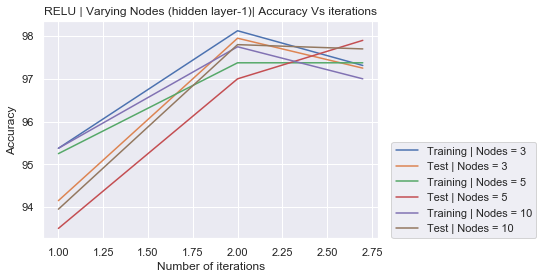

In [53]:
nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='relu')) # input layer requires input_dim param
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('RELU | Varying Nodes (hidden layer-1)| Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


# Activation Function used in both the layers : RELU
- number of nodes in layer 1: 3
- number of nodes in layer 2: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 92us/step - loss: 0.7202 - accuracy: 0.6022 - val_loss: 0.6034 - val_accuracy: 0.7531
Epoch 2/10
6400/6400 [==============================] - 0s 57us/step - loss: 0.5355 - accuracy: 0.7978 - val_loss: 0.4287 - val_accuracy: 0.9319
Epoch 3/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.4307 - accuracy: 0.8648 - val_loss: 0.3310 - val_accuracy: 0.9481
Epoch 4/10
6400/6400 [==============================] - 0s 58us/step - loss: 0.3801 - accuracy: 0.8752 - val_loss: 0.2824 - val_accuracy: 0.9481
Epoch 5/10
6400/6400 [==============================] - 0s 64us/step - loss: 0.3613 - accuracy: 0.8728 - val_loss: 0.2543 - val_accuracy: 0.9481
Epoch 6/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.3537 - accuracy: 0.8702 - val_loss: 0.2377 - val_accuracy: 0.9481
Epoch 7/10
6400/6400 [==============================] - 0s 64us/step - loss: 0.344

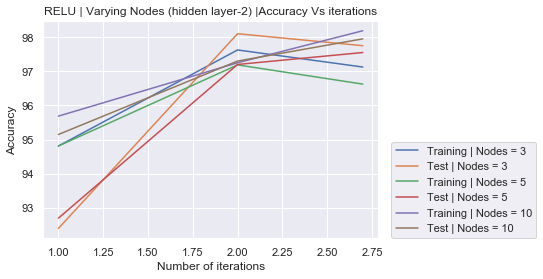

In [54]:
#15000
# As number of nodes = 3 in layer one gave least training and test error will check for
#appropriate number of nodes in layer 2

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='relu')) # input layer requires input_dim param
        model.add(Dense(3, activation='relu'))
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('RELU | Varying Nodes (hidden layer-2) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



# Activation Function used in all three layers : RELU
- number of nodes in layer 1: 3
- number of nodes in layer 2: 10
- number of nodes in layer 3: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 144us/step - loss: 0.6129 - accuracy: 0.6352 - val_loss: 0.5237 - val_accuracy: 0.8306
Epoch 2/10
6400/6400 [==============================] - 0s 68us/step - loss: 0.4739 - accuracy: 0.7827 - val_loss: 0.3744 - val_accuracy: 0.9144
Epoch 3/10
6400/6400 [==============================] - 0s 68us/step - loss: 0.3762 - accuracy: 0.8230 - val_loss: 0.2854 - val_accuracy: 0.9362
Epoch 4/10
6400/6400 [==============================] - 0s 65us/step - loss: 0.3312 - accuracy: 0.8292 - val_loss: 0.2346 - val_accuracy: 0.9450
Epoch 5/10
6400/6400 [==============================] - 0s 66us/step - loss: 0.2934 - accuracy: 0.8294 - val_loss: 0.2007 - val_accuracy: 0.9525
Epoch 6/10
6400/6400 [==============================] - 0s 74us/step - loss: 0.2799 - accuracy: 0.8464 - val_loss: 0.1761 - val_accuracy: 0.9581
Epoch 7/10
6400/6400 [==============================] - 0s 64us/step - loss: 0.25

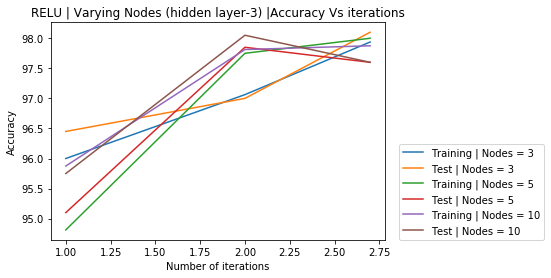

In [5]:
#15000
# As number of nodes = 3  in layer one gave least training and test error 
# As number of nodes = 10  in layer two gave least training and test error 
# Checking for appropriate number of nodes in layer 3


nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='relu')) # input layer requires input_dim param
        model.add(Dense(3, activation='relu'))
        model.add(Dense(3, activation='relu'))
        model.add(Dense(i, activation='relu'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('RELU | Varying Nodes (hidden layer-3) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


RELU ACTIVATION FUNCTION:
Layer 1 - 3
Layer 2 - 10
Layer 3 - 5

# SIGMOID

# Activation Function used in 1ST Hidden layers :SIGMOID
- number of nodes in layer 1: [3,5,10]
- sample size : 15000

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 85us/step - loss: 0.6666 - accuracy: 0.6009 - val_loss: 0.6324 - val_accuracy: 0.5688
Epoch 2/10
6400/6400 [==============================] - 0s 49us/step - loss: 0.5901 - accuracy: 0.6970 - val_loss: 0.5282 - val_accuracy: 0.8206
Epoch 3/10
6400/6400 [==============================] - 0s 50us/step - loss: 0.4945 - accuracy: 0.7967 - val_loss: 0.4298 - val_accuracy: 0.9106
Epoch 4/10
6400/6400 [==============================] - ETA: 0s - loss: 0.4154 - accuracy: 0.85 - 0s 53us/step - loss: 0.4106 - accuracy: 0.8598 - val_loss: 0.3593 - val_accuracy: 0.9450
Epoch 5/10
6400/6400 [==============================] - 0s 55us/step - loss: 0.3679 - accuracy: 0.8841 - val_loss: 0.3098 - val_accuracy: 0.9481
Epoch 6/10
6400/6400 [==============================] - 0s 57us/step - loss: 0.3382 - accuracy: 0.8963 - val_loss: 0.2753 - val_accuracy: 0.9481
Epoch 7/10
6400/6400 [==================

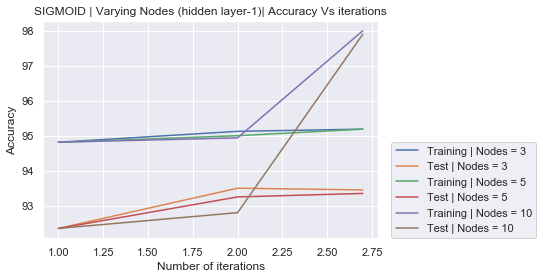

In [57]:
nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='sigmoid')) # input layer requires input_dim param
        model.add(Dense(i, activation='sigmoid'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('SIGMOID | Varying Nodes (hidden layer-1)| Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


In [ ]:
# Activation Function used in both the layers : SIGMOID
- number of nodes in layer 1: 10
- number of nodes in layer 2: [3,5,10]
- sample size :

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 82us/step - loss: 0.6834 - accuracy: 0.5741 - val_loss: 0.6525 - val_accuracy: 0.5656
Epoch 2/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.6019 - accuracy: 0.7145 - val_loss: 0.5229 - val_accuracy: 0.8356
Epoch 3/10
6400/6400 [==============================] - 0s 58us/step - loss: 0.4612 - accuracy: 0.8427 - val_loss: 0.3705 - val_accuracy: 0.9481
Epoch 4/10
6400/6400 [==============================] - 0s 64us/step - loss: 0.3619 - accuracy: 0.8639 - val_loss: 0.2909 - val_accuracy: 0.9481
Epoch 5/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.3177 - accuracy: 0.8961 - val_loss: 0.2545 - val_accuracy: 0.9481
Epoch 6/10
6400/6400 [==============================] - 0s 63us/step - loss: 0.2902 - accuracy: 0.9237 - val_loss: 0.2342 - val_accuracy: 0.9481
Epoch 7/10
6400/6400 [==============================] - 0s 59us/step - loss: 0.285

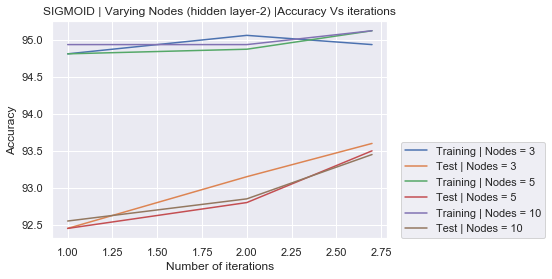

In [58]:
#15000
# As number of nodes = 10 in layer one gave least training and test error will check for
#appropriate number of nodes in layer 2

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='sigmoid')) # input layer requires input_dim param
        model.add(Dense(10, activation='sigmoid'))
        model.add(Dense(i, activation='sigmoid'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('SIGMOID | Varying Nodes (hidden layer-2) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



In [ ]:
# Activation Function used in all three layers : SIGMOID
- number of nodes in layer 1: 10
- number of nodes in layer 2: 10
- number of nodes in layer 3: [3,5,10]
- sample size : 

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 94us/step - loss: 0.6808 - accuracy: 0.5736 - val_loss: 0.6800 - val_accuracy: 0.5656
Epoch 2/10
6400/6400 [==============================] - 0s 60us/step - loss: 0.6424 - accuracy: 0.6089 - val_loss: 0.5679 - val_accuracy: 0.7719
Epoch 3/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.4567 - accuracy: 0.8509 - val_loss: 0.3561 - val_accuracy: 0.9481
Epoch 4/10
6400/6400 [==============================] - 0s 73us/step - loss: 0.3462 - accuracy: 0.8900 - val_loss: 0.2859 - val_accuracy: 0.9481
Epoch 5/10
6400/6400 [==============================] - 0s 56us/step - loss: 0.3097 - accuracy: 0.9228 - val_loss: 0.2541 - val_accuracy: 0.9481
Epoch 6/10
6400/6400 [==============================] - 0s 71us/step - loss: 0.2927 - accuracy: 0.9269 - val_loss: 0.2355 - val_accuracy: 0.9481
Epoch 7/10
6400/6400 [==============================] - 0s 57us/step - loss: 0.282

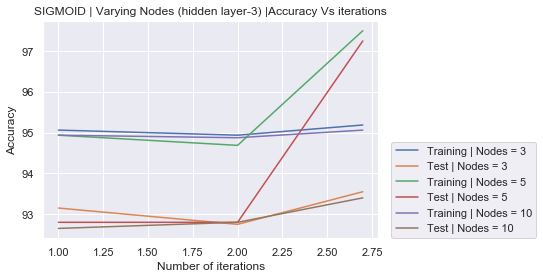

In [59]:
nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='sigmoid')) # input layer requires input_dim param
        model.add(Dense(10, activation='sigmoid'))
        model.add(Dense(10, activation='sigmoid'))
        model.add(Dense(i, activation='sigmoid'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('SIGMOID | Varying Nodes (hidden layer-3) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


In [ ]:
SIGMOID ACTIVATION FUNCTION:
Layer 1 - 3
Layer 2 - 10
Layer 3 - 5

# TANH

# Activation Function used in 1ST Hidden layers :TANH
- number of nodes in layer 1: [3,5,10]
- sample size : 

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 82us/step - loss: 0.5846 - accuracy: 0.7088 - val_loss: 0.4168 - val_accuracy: 0.8637
Epoch 2/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.3584 - accuracy: 0.8975 - val_loss: 0.2972 - val_accuracy: 0.9400
Epoch 3/10
6400/6400 [==============================] - 0s 51us/step - loss: 0.2906 - accuracy: 0.9367 - val_loss: 0.2603 - val_accuracy: 0.9438
Epoch 4/10
6400/6400 [==============================] - 0s 77us/step - loss: 0.2684 - accuracy: 0.9409 - val_loss: 0.2413 - val_accuracy: 0.9456
Epoch 5/10
6400/6400 [==============================] - 0s 51us/step - loss: 0.2528 - accuracy: 0.9416 - val_loss: 0.2288 - val_accuracy: 0.9463
Epoch 6/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.2421 - accuracy: 0.9409 - val_loss: 0.2200 - val_accuracy: 0.9456
Epoch 7/10
6400/6400 [==============================] - 0s 53us/step - loss: 0.242

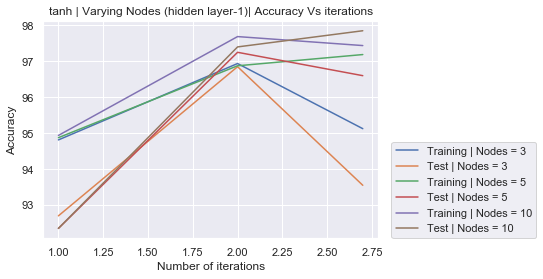

In [61]:
nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(i, activation='tanh'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('tanh | Varying Nodes (hidden layer-1)| Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


In [ ]:
# Activation Function used in both the layers : TANH
- number of nodes in layer 1: 10 
- number of nodes in layer 2: [3,5,10]
- sample size : 

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 83us/step - loss: 0.4158 - accuracy: 0.8619 - val_loss: 0.2778 - val_accuracy: 0.9444
Epoch 2/10
6400/6400 [==============================] - 0s 55us/step - loss: 0.2624 - accuracy: 0.9416 - val_loss: 0.2204 - val_accuracy: 0.9481
Epoch 3/10
6400/6400 [==============================] - 0s 65us/step - loss: 0.2352 - accuracy: 0.9411 - val_loss: 0.2072 - val_accuracy: 0.9481
Epoch 4/10
6400/6400 [==============================] - 0s 56us/step - loss: 0.2299 - accuracy: 0.9417 - val_loss: 0.2014 - val_accuracy: 0.9481
Epoch 5/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.2230 - accuracy: 0.9427 - val_loss: 0.1959 - val_accuracy: 0.9481
Epoch 6/10
6400/6400 [==============================] - 0s 67us/step - loss: 0.2209 - accuracy: 0.9430 - val_loss: 0.1920 - val_accuracy: 0.9481
Epoch 7/10
6400/6400 [==============================] - ETA: 0s - loss: 0.2149 - a

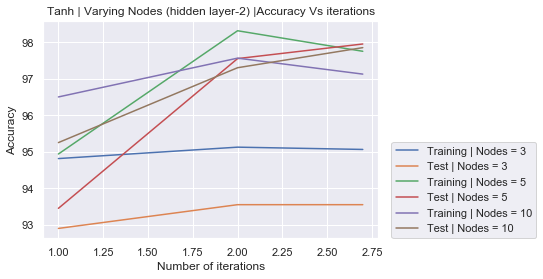

In [62]:
#15000
# As number of nodes = 10 in layer one gave least training and test error will check for
#appropriate number of nodes in layer 2

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(10, activation='tanh'))
        model.add(Dense(i, activation='tanh'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('Tanh | Varying Nodes (hidden layer-2) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show



In [ ]:
# Activation Function used in all three layers : TANH
- number of nodes in layer 1: 10
- number of nodes in layer 2: 10
- number of nodes in layer 3: [3,5,10]
- sample size : 

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 106us/step - loss: 0.4953 - accuracy: 0.7780 - val_loss: 0.2946 - val_accuracy: 0.9369
Epoch 2/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.2703 - accuracy: 0.9370 - val_loss: 0.2172 - val_accuracy: 0.9450
Epoch 3/10
6400/6400 [==============================] - 0s 70us/step - loss: 0.2354 - accuracy: 0.9419 - val_loss: 0.2009 - val_accuracy: 0.9481
Epoch 4/10
6400/6400 [==============================] - 0s 61us/step - loss: 0.2310 - accuracy: 0.9428 - val_loss: 0.1964 - val_accuracy: 0.9475
Epoch 5/10
6400/6400 [==============================] - 0s 62us/step - loss: 0.2188 - accuracy: 0.9436 - val_loss: 0.1923 - val_accuracy: 0.9475
Epoch 6/10
6400/6400 [==============================] - 0s 60us/step - loss: 0.2180 - accuracy: 0.9441 - val_loss: 0.1856 - val_accuracy: 0.9506
Epoch 7/10
6400/6400 [==============================] - 0s 60us/step - loss: 0.21

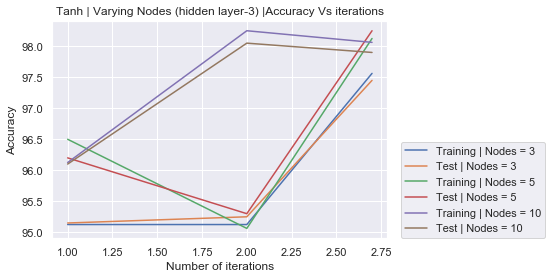

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

nodes = [3,5,10]
accuracy_list=[]
accuracy_list_test=[]
accuracy_list_train=[]
epochs =[10,100,500]

for i in nodes:
    accuracy_list_test=[]
    accuracy_list_train=[]
    for j in epochs:
        model = Sequential()
        model.add(Dense(15, input_dim=14, activation='tanh')) # input layer requires input_dim param
        model.add(Dense(10, activation='tanh'))
        model.add(Dense(5, activation='tanh'))
        model.add(Dense(i, activation='tanh'))
        model.add(Dropout(.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])
        model.fit(x_train2, y_train2, epochs = j, batch_size=20, validation_data=(x_test2, y_test2))
        scores_test  = model.evaluate(x_test,y_test)
        scores_train = model.evaluate(x_test2,y_test2)
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_test[1]*100))
        print("\n%s: %.2f%%" %(model.metrics_names[1],scores_train[1]*100))
        accuracy_list_test.append(scores_test[1]*100)
        accuracy_list_train.append(scores_train[1]*100)
        
    plt.plot(np.log10(epochs),accuracy_list_train, label="Training | Nodes = "+str(i))
    plt.plot(np.log10(epochs),accuracy_list_test, label="Test | Nodes = "+str(i))
    plt.xlabel('Number of iterations')
    plt.ylabel('Accuracy')  
    plt.title('Tanh | Varying Nodes (hidden layer-3) |Accuracy Vs iterations')
    plt.legend(loc=(1.04,0))
    plt.show


In [ ]:
TANH ACTIVATION FUNCTION:
Layer 1 - 10
Layer 2 - 10
Layer 3 - 10